In [1]:
#Solution 1
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Step 1: Import Libraries and Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Step 2a: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,       # Rotate images up to 30 degrees
    width_shift_range=0.2,   # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    horizontal_flip=True
)

datagen.fit(x_train)

# Step 3 and 4: Define CNN Architecture and Add Dropout
hidden_layer_sizes = [128, 64]  # Modified hidden layer sizes
dropout_rates = [0.3, 0.5]     # Adjusted dropout rates

results = []

In [ ]:
for size in hidden_layer_sizes:
    for rate in dropout_rates:
        # Step 4a: Define CNN architecture with different hidden layer sizes and dropout rates
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(size, activation='relu'))
        model.add(Dropout(rate))  # Added dropout layer
        model.add(Dense(10, activation='softmax'))

        # Step 5: Compile Model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Step 6: Train the Model
        history = model.fit(datagen.flow(x_train, to_categorical(y_train), batch_size=64),
                            epochs=15, validation_data=(x_test, to_categorical(y_test)))

        # Step 7: Evaluate Model
        train_loss, train_accuracy = model.evaluate(x_train, to_categorical(y_train))
        test_loss, test_accuracy = model.evaluate(x_test, to_categorical(y_test))

        # Step 8: Store Results
        results.append({
            'Hidden Layer Size': size,
            'Dropout Rate': rate,
            'Train Classification Error': 1 - train_accuracy,
            'Test Classification Error': 1 - test_accuracy
        })

Epoch 1/15
782/782 [==============================] - 95s 119ms/step - loss: 1.7977 - accuracy: 0.3337 - val_loss: 1.4488 - val_accuracy: 0.4820
Epoch 2/15
782/782 [==============================] - 91s 116ms/step - loss: 1.5816 - accuracy: 0.4260 - val_loss: 1.3152 - val_accuracy: 0.5345
Epoch 3/15
782/782 [==============================] - 91s 116ms/step - loss: 1.4910 - accuracy: 0.4605 - val_loss: 1.2991 - val_accuracy: 0.5243
Epoch 4/15
782/782 [==============================] - 93s 119ms/step - loss: 1.4374 - accuracy: 0.4842 - val_loss: 1.2558 - val_accuracy: 0.5555
Epoch 5/15
782/782 [==============================] - 93s 119ms/step - loss: 1.3934 - accuracy: 0.5018 - val_loss: 1.1478 - val_accuracy: 0.6045
Epoch 6/15
782/782 [==============================] - 93s 119ms/step - loss: 1.3692 - accuracy: 0.5111 - val_loss: 1.1154 - val_accuracy: 0.6044
Epoch 7/15
782/782 [==============================] - 92s 118ms/step - loss: 1.3333 - accuracy: 0.5231 - val_loss: 1.1157 - val_ac

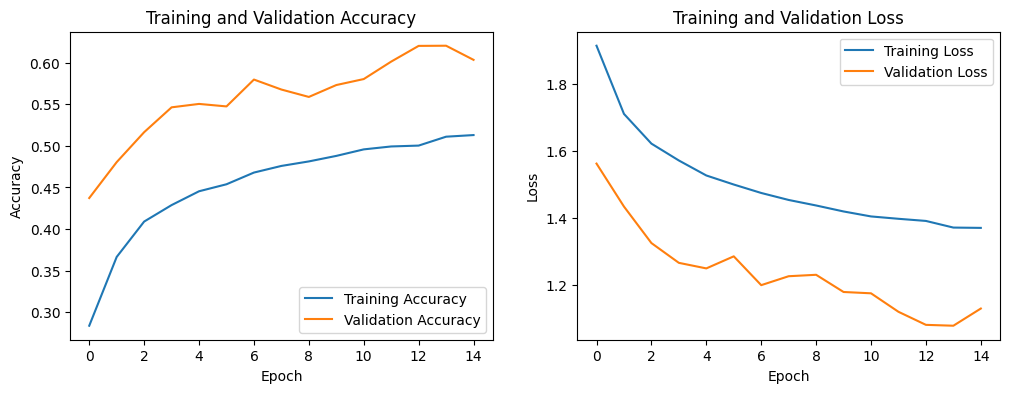

   Hidden Layer Size  Dropout Rate  Train Classification Error  \
0                128           0.3                     0.34846   
1                128           0.5                     0.35162   
2                 64           0.3                     0.37522   
3                 64           0.5                     0.39214   

   Test Classification Error  
0                     0.3554  
1                     0.3575  
2                     0.3741  
3                     0.3966  


In [5]:
# Step 9: Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Step 10: Create a Table with Classification Errors
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

In [11]:
# Code Description:

# This code implements a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset.

# 1. Import Libraries and Load Dataset:
#    - Libraries such as NumPy, Matplotlib, and Keras are imported.
#    - CIFAR-10 dataset, consisting of 60,000 32x32 color images in 10 different classes, is loaded.

# 2. Data Preprocessing:
#    - Pixel values of the images are normalized to the range [0, 1].
#    - Data augmentation techniques are applied using Keras' `ImageDataGenerator` to enhance the training dataset.

# 3. Define CNN Architecture and Add Dropout:
#    - CNN architecture is defined with two convolutional layers, max-pooling layers, and fully connected layers.
#    - Dropout layers are added to prevent overfitting.

# 4. Training the Model:
#    - The model is trained using the augmented data generated by the `ImageDataGenerator`.
#    - Training is done for 15 epochs.

# 5. Evaluate and Visualize:
#    - Training and validation accuracy/loss curves are plotted to visualize model performance.

# 6. Store and Display Results:
#    - Classification errors (1 - accuracy) for both training and testing are stored in a DataFrame.
#    - A table of results and plots of training history are displayed.

# CIFAR-10 Dataset:

# The CIFAR-10 dataset is a collection of 60,000 32x32 color images in 10 different classes,
# with 6,000 images per class. The classes include objects such as
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
# It is commonly used for image classification tasks and serves as a benchmark dataset
# for evaluating the performance of machine learning models on image recognition.

# Model Performance:

# The model's performance can be assessed by analyzing the training and validation accuracy/loss curves.
# Additionally, the classification errors on both the training and testing datasets are recorded.
# The dropout layers are incorporated to enhance the model's generalization capability,
# helping prevent overfitting. The overall conclusion about the model's performance can be drawn
# by observing the trade-off between training accuracy and the ability to generalize to unseen data.
# If the model achieves high accuracy on the validation set and shows consistent performance across
# multiple configurations, it can be considered successful.


In [3]:
#Solution 2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# Load your dataset
with open('Corpus.txt', 'r', encoding='utf-8') as file:
    data = file.readlines()

# Assuming data is a list of conversations
# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

# Convert text data to sequences
input_sequences = tokenizer.texts_to_sequences(data)

In [7]:
# Create input sequences and corresponding target sequences
sequences = []
for seq in input_sequences:
    for i in range(1, len(seq)):
        n_gram_sequence = seq[:i+1]
        sequences.append(n_gram_sequence)

# Pad sequences for equal length
max_sequence_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')

X, y = sequences[:, :-1], sequences[:, -1]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Different LSTM Model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dense(units=total_words, activation='softmax'))
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
527/527 [==============================] - 318s 582ms/step - loss: 6.2612 - accuracy: 0.0557 - val_loss: 5.9677 - val_accuracy: 0.0909
Epoch 2/5
527/527 [==============================] - 285s 541ms/step - loss: 5.7025 - accuracy: 0.0883 - val_loss: 5.9002 - val_accuracy: 0.0897
Epoch 3/5
527/527 [==============================] - 254s 482ms/step - loss: 5.5266 - accuracy: 0.0973 - val_loss: 5.8746 - val_accuracy: 0.0964
Epoch 4/5
527/527 [==============================] - 255s 485ms/step - loss: 5.3831 - accuracy: 0.1109 - val_loss: 5.8489 - val_accuracy: 0.1078
Epoch 5/5
527/527 [==============================] - 255s 485ms/step - loss: 5.2396 - accuracy: 0.1204 - val_loss: 5.8146 - val_accuracy: 0.1182


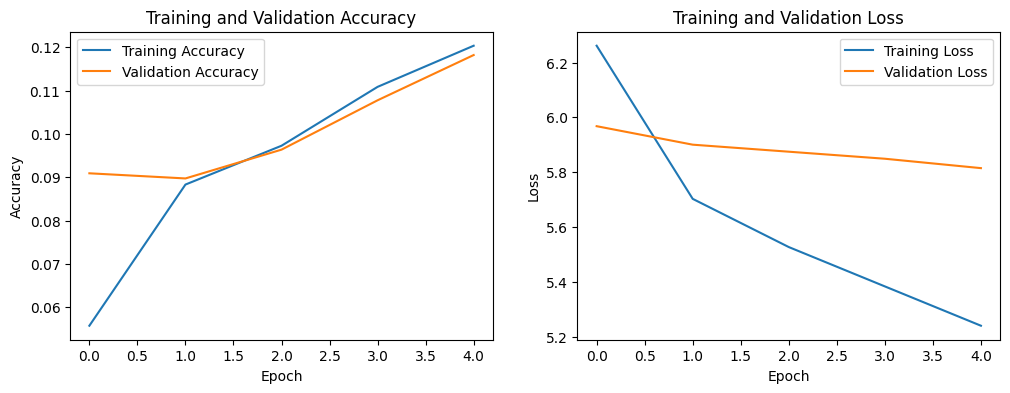

In [10]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [ ]:
# The provided code is an implementation of a more complex LSTM (Long Short-Term Memory) model for language modeling, particularly in predicting the next word in a sequence. Here's a brief description:

# 1. Data Preprocessing:
#    - The code starts by loading and processing a dataset of human conversations.
#    - It tokenizes the text data, converting words into numerical indices, and creates sequences of input and output pairs.

# 2. Model Architecture:
#    - Instead of a simple LSTM model, this code uses a more sophisticated LSTM architecture.
#    - It consists of an embedding layer to represent words in a continuous vector space, two LSTM layers for capturing sequential patterns, and a dropout layer to prevent overfitting.

# 3. Training the Model:
#    - The model is trained on the input sequences and corresponding target sequences.
#    - Training is done for a specified number of epochs (iterations through the entire dataset).

# 4. Evaluation and Visualization:
#    - The code records and plots the training and validation accuracy and loss over epochs.
#    - This visualization helps assess how well the model is learning and generalizing from the training data to unseen validation data.

# How it's better than a simple LSTM model:
# - **Model Complexity:** The added complexity in architecture (multiple LSTM layers and dropout) allows the model to learn more intricate patterns and relationships in the data.
# - **Improved Generalization:** The dropout layer helps prevent overfitting, making the model generalize better to new, unseen data.
# - **Better Representation:** The use of multiple LSTM layers enables the model to capture long-term dependencies in the sequence, which can be crucial for understanding context in language.

# In simpler terms, the code uses a fancier version of the LSTM model that's better at understanding and predicting human conversations, thanks to its ability to capture more complex patterns and avoid getting too focused on the training data.